### Case Study 1.2.1 - Identifying Faces

DO IT YOURSELF
Case Study 1.2.1: PCA - Identifying Faces
Instructor: Stefanie Jegelka
Activity Type: Optional 
Case Study Description: Classifying and identifying human faces.
Why this Case Study? Build your own implementation of an image classification algorithm that helps classify new photos of humans! This can help you understand how it is possible for Facebook to suggest, very accurately, who to tag in a given photo with people's photos.
Self-Help Documentation: In this document, we walk through some helpful tips to get you started with building your own application for classifying faces in photo images using Principle Component Analysis (PCA). In this tutorial, we provide examples and some pseudo-code for the following programming environment: Matlab. 
Download Self-Help Documentation

Download Pictures DataSet

Time Required: The time required to do this activity varies depending on your experience in the required programming background. We suggest planning somewhere between 1 & 3 hours. Remember, this is an optional activity for participants looking for hands-on experience.



### Processing and Visualising Data

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import os
from glob import glob

from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from itertools import chain
import numpy as np
import scipy as sp


In [3]:
image_dir = './instructors'
n_instructors = 14

In [7]:
import math
import os
import hashlib
from urllib.request import urlretrieve
import zipfile
import gzip
import shutil

import numpy as np
from PIL import Image

def get_image(image_path, width, height, mode):
    
    image = Image.open(image_path)

    return np.array(image.convert(mode))


def get_batch(image_files, width, height, mode):
    data_batch = np.array(
        [get_image(sample_file, width, height, mode) for sample_file in image_files]).astype(np.float32)



    return data_batch

In [8]:
instructor_images = get_batch(glob(os.path.join(image_dir, '*.jpg'))[:n_instructors], 300, 300, 'L')

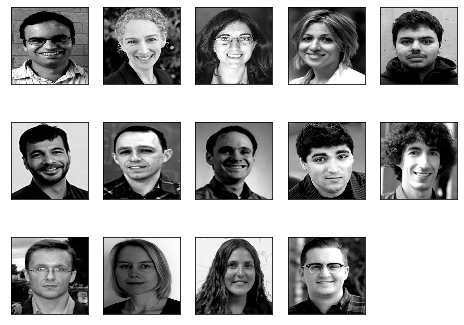

In [9]:
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(n_instructors):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(instructor_images[i], cmap='gray')

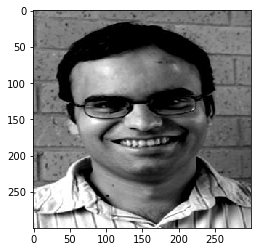

In [10]:
#Example Normal
plt.imshow(instructor_images[0], cmap='gray')
plt.show()

### Normalizing the Data and applying PCA

In [11]:
#Normalizing


face_vector = []

for i in instructor_images:
    face_image = i.reshape(300*300,)
    face_vector.append(face_image)
    
face_vector = np.asarray(face_vector)



In [12]:
# Mean face
face_vector.shape


(14, 90000)

In [13]:
model = PCA(n_components=n_instructors)
normalized = normalize(face_vector)
model.fit(normalized)
normalized_transformed = model.transform(normalized)

### Computing eigenfaces

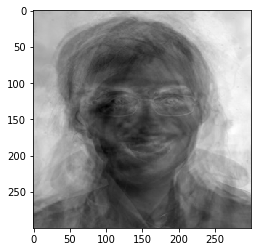

In [14]:
#Example Normalized with eigenfaces
plt.imshow(model.components_[0].reshape(300,300), cmap='gray')
plt.show()

## Classifying and Reconstructing the Faces

In [15]:
faces_pca = PCA(n_components=n_instructors)

faces_pca.fit(normalize(face_vector))
    
components = faces_pca.transform(face_vector)

projected = faces_pca.inverse_transform(components)


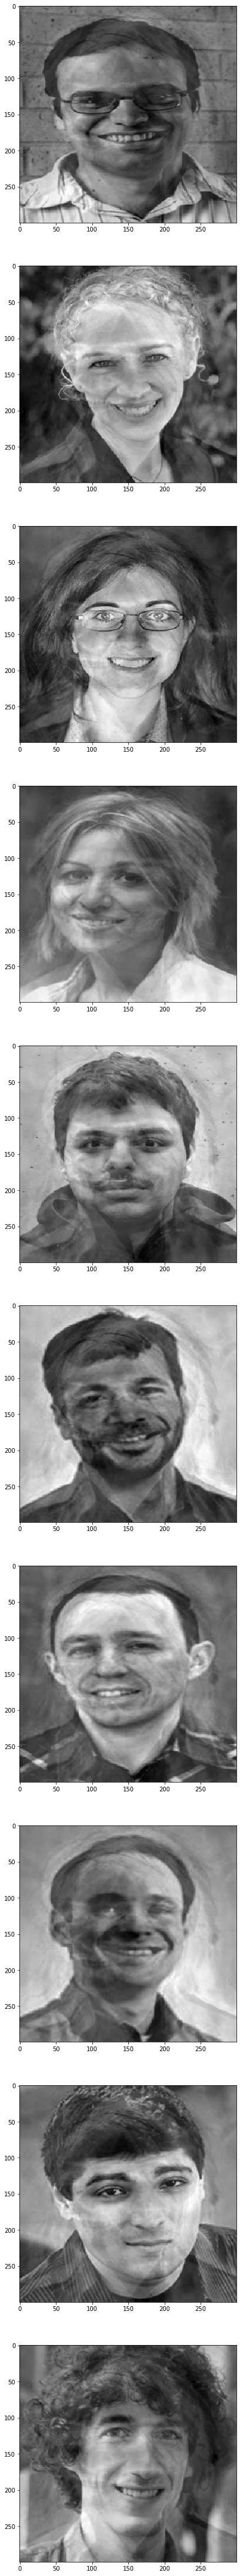

In [16]:
fig, axes = plt.subplots(10,1,figsize=(20,80))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(300,300),cmap="gray")